In [201]:
import subprocess
import sys

# Function to check and install missing module
def install_and_import(module_name):
    try:
        globals()[module_name] = __import__(module_name)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", module_name])
        globals()[module_name] = __import__(module_name)

# List of modules to check and import
modules = [
    "censusdata",
    "pandas",
    "plotly",
    "ipywidgets",
    "census",
    "us",
    "tqdm"
]

# Check and import all modules
for module in modules:
    install_and_import(module)

# After running the above code, the modules will be available
# Continue with your code
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interactive

from census import Census
from us import states
from tqdm import tqdm


# Downloading Census Data and Visualizing Interactive plots

__In this notebook, you will learn to doanload Census Data from the American Community Survey, and then represent it as straightforward, interactive, line charts and bar charts__

## enjoy!

# Start
__by navigating tho this website and requesting an API key:__

https://api.census.gov/data/key_signup.html

An API key is like a secret password that allows different software applications to talk to each other securely and access specific features or data.

In [114]:
# Set the API key sent to your email

key = '6ba5559b5464b63389f273acaecde905e7405e83'

c = Census(key)

# Download the Variables of your choosing

The current code downloads variables pertaining to income class in LA county, but you can choose other variables!

__Navigate to this data table listing different variables that can be found in the ACS to find alternatives:__

https://api.census.gov/data/2022/acs/acs5/groups/.html

Remember that to use these variables you will have to modify the variable names in the code bellow.

In [139]:
# Unclean table
vars = (
    'NAME',  # Name of the tract
    'B01003_001E', # total pop

    # yearly income vars
    'B19001_001E', # total Households,
    'B19001_002E', # Income above previous and under 10k,
    'B19001_003E', # Income above previous and under 15k,
    'B19001_004E', # Income above previous and under 20k,
    'B19001_005E', # Income above previous and under 25k,
    'B19001_006E', # Income above previous and under 30k,
    'B19001_007E', # Income above previous and under 35k,
    'B19001_008E', # Income above previous and under 40k,
    'B19001_009E', # Income above previous and under 45k,
    'B19001_010E', # Income above previous and under 50k,
    'B19001_011E', # Income above previous and under 60k,
    'B19001_012E', # Income above previous and under 75k,
    'B19001_013E', # Income above previous and under 100k,
    'B19001_014E', # Income above previous and under 125k,
    'B19001_015E', # Income above previous and under 150k,
    'B19001_016E', # Income above previous and under 200k,
    'B19001_017E', # 200k And Over',
    
    )

LAinc_Data = c.acs5.state_county_tract(fields=vars,
                                      state_fips=states.CA.fips,
                                      county_fips="037",
                                      tract="*",
                                      year=2022)
df = pd.DataFrame(LAinc_Data)

In [140]:
# view data
df.head(2)

,NAME,B01003_001E,B19001_001E,B19001_002E,B19001_003E,B19001_004E,B19001_005E,B19001_006E,B19001_007E,B19001_008E,...,B19001_011E,B19001_012E,B19001_013E,B19001_014E,B19001_015E,B19001_016E,B19001_017E,state,county,tract
0,Census Tract 1011.10; Los Angeles County; Cali...,4014.0,1551.0,67.0,96.0,33.0,72.0,11.0,78.0,19.0,...,74.0,221.0,102.0,182.0,144.0,123.0,177.0,06,037,101110
1,Census Tract 1011.22; Los Angeles County; Cali...,4164.0,1383.0,84.0,0.0,7.0,44.0,20.0,29.0,0.0,...,31.0,208.0,173.0,102.0,181.0,204.0,286.0,06,037,101122


## Let's clean this table up

The code bellow uses a python package called pandas to reorganize the columns and rename the variables using Natural Language (i.e. human language). Don't worry too much about the code, just make sure you read the commented code (text following a hashtag) to understand what is happening.

In [142]:
# Reorder the columns to move 'state', 'county', 'tract' to the beginning
columns_order = ['state', 'county', 'tract'] + [col for col in df.columns if col not in ['GEO_ID', 'state', 'county', 'tract']]
df = df[columns_order]

In [143]:
# renaming variables

# Dictionary mapping census codes to descriptions
column_mapping = {
    'B01003_001E': 'Total_Pop',
    
    # Income Brackets
    'B19001_001E': 'Total_House',
    'B19001_002E': 'Inc<10',
    'B19001_003E': '10<Inc<15',
    'B19001_004E': '15<Inc<20',
    'B19001_005E': '20<Inc<25',
    'B19001_006E': '25<Inc<30',
    'B19001_007E': '30<Inc<35',
    'B19001_008E': '35<Inc<40',
    'B19001_009E': '40<Inc<45',
    'B19001_010E': '45<Inc<50',
    'B19001_011E': '50<Inc<60',
    'B19001_012E': '60<Inc<75',
    'B19001_013E': '75<Inc<100',
    'B19001_014E': '100<Inc<125',
    'B19001_015E': '125<Inc<150',
    'B19001_016E': '150<Inc<200',
    'B19001_017E': '200<Inc',
}

# Rename columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)


In [144]:
df.head(1)

,state,county,tract,NAME,Total_Pop,Total_House,Inc<10,10<Inc<15,15<Inc<20,20<Inc<25,...,35<Inc<40,40<Inc<45,45<Inc<50,50<Inc<60,60<Inc<75,75<Inc<100,100<Inc<125,125<Inc<150,150<Inc<200,200<Inc
0,06,037,101110,Census Tract 1011.10; Los Angeles County; Cali...,4014.0,1551.0,67.0,96.0,33.0,72.0,...,19.0,56.0,96.0,74.0,221.0,102.0,182.0,144.0,123.0,177.0


In [150]:
df.columns

Index(['state', 'county', 'tract', 'NAME', 'Total_Pop', 'Total_House',
       'Inc<10', '10<Inc<15', '15<Inc<20', '20<Inc<25', '25<Inc<30',
       '30<Inc<35', '35<Inc<40', '40<Inc<45', '45<Inc<50', '50<Inc<60',
       '60<Inc<75', '75<Inc<100', '100<Inc<125', '125<Inc<150', '150<Inc<200',
       '200<Inc'],
      dtype='object')

## Let's Visualize the Distribution of Household Income In LA County

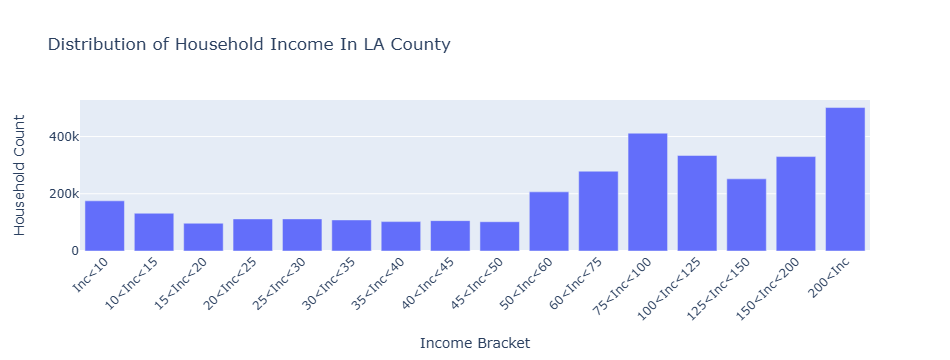

In [154]:
# Sum each income bracket across all tracts to get totals for the entire county
income_totals = df[['Inc<10', '10<Inc<15', '15<Inc<20', '20<Inc<25', '25<Inc<30',
                    '30<Inc<35', '35<Inc<40', '40<Inc<45', '45<Inc<50', '50<Inc<60',
                    '60<Inc<75', '75<Inc<100', '100<Inc<125', '125<Inc<150', '150<Inc<200',
                    '200<Inc']].sum()

# Convert totals to a DataFrame for easy plotting
income_totals_df = income_totals.reset_index()
income_totals_df.columns = ['Income_Bracket', 'Household_Count']


# Plot a bar chart using Plotly Express
fig = px.bar(income_totals_df, x='Income_Bracket', y='Household_Count',
             title="Distribution of Household Income In LA County",
             labels={'Income_Bracket': 'Income Bracket', 'Household_Count': 'Household Count'})

# Customize layout for readability
fig.update_layout(xaxis_tickangle=-45)  # Tilt x-axis labels for readability
fig.show()


# Now let's modify the code to add Race and Latino Demographics and examine several years

After running the cell below, you will be prompted to indicate the range of time you wish to examine. **Remember that the wider your time frame, the longer it will take to download the data from the census API. The census API might run into issues during this time.** I recommend starting with a small range (3-6 years max). That said, do your thing, have fun, break the code, rahhhh!

If you are requesting more data, i.e., a wider time frame, and you run into errors, DON'T FRET. These errors can usually be dealt with by modifying the code—feel free to try this process, referred to as debugging.  
*Fun fact:* it's called debugging in reference to the story behind an early computer that broke down back in ancient times (jokes, around the 1950s). The root cause? A lil'bug.


## download

In [185]:
# Define the variables we want to retrieve
vars = (
    'NAME',  # Name of the tract
    'B01003_001E', # Total population
    'B19001_001E', # Total households
    'B19001_002E', # Income Under 10k
    'B19001_003E', # Income Under 15k
    'B19001_004E', # Income Under 20k
    'B19001_005E', # Income Under 25k
    'B19001_006E', # Income Under 30k
    'B19001_007E', # Income Under 35k
    'B19001_008E', # Income Under 40k
    'B19001_009E', # Income Under 45k
    'B19001_010E', # Income Under 50k
    'B19001_011E', # Income Under 60k
    'B19001_012E', # Income Under 75k
    'B19001_013E', # Income Under 100k
    'B19001_014E', # Income Under 125k
    'B19001_015E', # Income Under 150k
    'B19001_016E', # Income Under 200k
    'B19001_017E',  # Income 200k And Over
    'B02001_001E', # Total population by race
    'B02001_002E', # White
    'B02001_003E', # Black
    'B02001_004E', # Native American
    'B02001_005E', # Asian
    'B02001_006E', # Native Hawaiian/Pacific Islander
    'B02001_007E', # Other
    'B02001_008E', # Two or more races
    'B02001_009E', # Two or more with Other race
    'B02001_010E', # Two or more with no Other race/Three or more
    'B03002_012E', # Latino
    'B03002_013E', # Latino White
    'B03002_014E', # Latino Black
    'B03002_015E', # Latino Native American
    'B03002_016E', # Latino Asian
    'B03002_017E', # Latino Native Hawaiian/Pacific Islander
    'B03002_018E', # Latino Other
    'B03002_019E', # Latino Two or more races
)

# Initialize an empty list to collect data for each year
data_all_years = []

# Ask the user for the start and end year
start_year = int(input("Enter the start year: "))
end_year = int(input("Enter the end year: "))

# Check if the end year is valid
if end_year > 2022:
    print("Error: The end year can only be 2022 or earlier.")
else:
    # Use tqdm to show progress for each year in the specified range
    for year in tqdm(range(start_year, end_year + 1), desc="Loading data by year"):
        # Retrieve data for the specified year
        year_data = c.acs5.state_county_tract(
            fields=vars,
            state_fips=states.CA.fips,
            county_fips="037",
            tract="*",
            year=year
        )

        # Add the year as a new column in each record
        for record in year_data:
            record['year'] = year

        # Append the yearly data to the list
        data_all_years.extend(year_data)

    # Convert the list of records to a DataFrame
    df = pd.DataFrame(data_all_years)

columns_order = ['state', 'county', 'tract', 'year'] + [col for col in df.columns if col not in ['year','state', 'county', 'tract']]
df = df[columns_order]

# Dictionary mapping census codes to descriptions
column_mapping = {
    'B01003_001E': 'Total_Pop',
    
    # Income Brackets
    'B19001_001E': 'Total_House',
    'B19001_002E': 'Inc<10',
    'B19001_003E': '10<Inc<15',
    'B19001_004E': '15<Inc<20',
    'B19001_005E': '20<Inc<25',
    'B19001_006E': '25<Inc<30',
    'B19001_007E': '30<Inc<35',
    'B19001_008E': '35<Inc<40',
    'B19001_009E': '40<Inc<45',
    'B19001_010E': '45<Inc<50',
    'B19001_011E': '50<Inc<60',
    'B19001_012E': '60<Inc<75',
    'B19001_013E': '75<Inc<100',
    'B19001_014E': '100<Inc<125',
    'B19001_015E': '125<Inc<150',
    'B19001_016E': '150<Inc<200',
    'B19001_017E': '200<Inc',


    # Race & Latino
    'B02001_001E': 'Total_Race',
    'B02001_002E': 'White',
    'B02001_003E': 'Black',
    'B02001_004E': 'NaAm',
    'B02001_005E': 'Asian',
    'B02001_006E': 'NaHaw_PacificIs',
    'B02001_007E': 'Other_Race',
    'B02001_008E': 'TwoPlus_Race',
    'B02001_009E': 'TwoPlus_Other',
    'B02001_010E': 'TwoPlusNoOther_ThreePlus',

    'B03002_012E': 'Latino',
    'B03002_013E': 'Latino_White',
    'B03002_014E': 'Latino_Black',
    'B03002_015E': 'Latino_NaAm',
    'B03002_016E': 'Latino_Asian',
    'B03002_017E': 'Latino_NaHaw_PacificIs',
    'B03002_018E': 'Latino_Other',
    'B03002_019E': 'Latino_TwoPlus',
}

# Rename columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

Enter the start year:  2018
Enter the end year:  2022


Loading data by year: 100%|██████████| 5/5 [00:08<00:00,  1.75s/it]


## visuzalize

In [237]:
# Income columns for the income brackets
income_columns = ['Inc<10', '10<Inc<15', '15<Inc<20', '20<Inc<25', '25<Inc<30',
                  '30<Inc<35', '35<Inc<40', '40<Inc<45', '45<Inc<50', '50<Inc<60',
                  '60<Inc<75', '75<Inc<100', '100<Inc<125', '125<Inc<150', '150<Inc<200',
                  '200<Inc']

# Define the races to compare
race_columns = ['White', 'Black', 'NaAm', 'Asian', 'NaHaw_PacificIs', 'Other_Race',
                'TwoPlus_Race', 'Latino','Latino_White','Latino_Black','Latino_NaAm',
                'Latino_Asian','Latino_NaHaw_PacificIs','Latino_Other','Latino_TwoPlus']

# Function to aggregate data by race and income bracket for a specific year
def calculate_household_counts_by_race(df, race, year):
    # Filter the data for the selected year
    year_data = df[df['year'] == year]
    
    # Create a DataFrame to hold the counts of households in each income bracket for the selected race
    household_counts = {income_bracket: year_data[year_data[race] > 0][income_bracket].sum() 
                        for income_bracket in income_columns}
    
    # Convert to a DataFrame for plotting
    return pd.DataFrame(list(household_counts.items()), columns=['Income_Bracket', 'Household_Count'])

# Create a Plotly Express bar chart for the given year and race
def create_income_bar_chart(df, race, year):
    # Get the household counts for the selected race and year
    household_counts_df = calculate_household_counts_by_race(df, race, year)
    
    # Create a bar chart
    fig = px.bar(household_counts_df, x='Income_Bracket', y='Household_Count',
                 title=f'{race} Household Distribution by Income Bracket ({year})',
                 labels={'Income_Bracket': 'Income Bracket', 'Household_Count': 'Household Count'})
    
    # Customize the layout
    fig.update_layout(xaxis_tickangle=-45)
    return fig

# Create the interactive plot with a slider for year and dropdown for race
def update_plots(year, demographic_category1, demographic_category2):
    # Create the subplot layout (2 plots side by side)
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f'{demographic_category1} Distribution', f'{demographic_category2} Distribution'])
    
    # Create the first bar chart for demographic_category1 (race1)
    household_counts_df1 = calculate_household_counts_by_race(df, demographic_category1, year)
    fig1 = go.Bar(x=household_counts_df1['Income_Bracket'], y=household_counts_df1['Household_Count'],
                  name=demographic_category1)
    
    # Add the first bar chart to the subplot
    fig.add_trace(fig1, row=1, col=1)

    # Create the second bar chart for demographic_category2 (race2)
    household_counts_df2 = calculate_household_counts_by_race(df, demographic_category2, year)
    fig2 = go.Bar(x=household_counts_df2['Income_Bracket'], y=household_counts_df2['Household_Count'],
                  name=demographic_category2)
    
    # Add the second bar chart to the subplot
    fig.add_trace(fig2, row=1, col=2)

    # Update layout to make the axes clean and add x and y titles
    fig.update_layout(
        title_text=f'Income Distribution Comparison ({year})',
        xaxis_tickangle=-45,
        showlegend=True
    )

    # Add x and y axis titles for the first chart (demographic_category1)
    fig.update_xaxes(title_text='Income Bracket', row=1, col=1)
    fig.update_yaxes(title_text='Household Count', row=1, col=1)

    # Add x and y axis titles for the second chart (demographic_category2)
    fig.update_xaxes(title_text='Income Bracket', row=1, col=2)
    fig.update_yaxes(title_text='Household Count', row=1, col=2)
    
    # Show the figure
    fig.show()

# Get unique years and races
years = df['year'].unique()

# Create the interactive widgets
year_slider = widgets.IntSlider(min=min(years), max=max(years), step=1, value=min(years),
                                description='Year:', layout=widgets.Layout(width='1000px'))
demographic_category1_dropdown = widgets.Dropdown(options=race_columns, description='DemogCat1:')
demographic_category2_dropdown = widgets.Dropdown(options=race_columns, description='DemogCat2:')

# Create the interactive widget
interactive_plot = interactive(update_plots,
                               demographic_category1=demographic_category1_dropdown,
                               year=year_slider,
                               demographic_category2=demographic_category2_dropdown)

# Display the interactive widget (with the plots)
interactive_plot


interactive(children=(IntSlider(value=2018, description='Year:', layout=Layout(width='1000px'), max=2022, min=…